<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/DL4CV_2_Architecture_Module_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome!**

# Introduction to Machine Learning for Computer Vision

#### Deeper Architectures:  Visual Geometry Group Network [VGG]


## **Lecturer :** Matteo Alberti

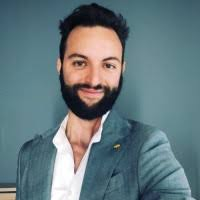

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary

- <font color=C24024>**Deep Convolutional Neural Networks** </font> : [VGG Net]

- <font color=CA4A2F>**Hands-On** </font> : from Paper to Code

- <font color=F4C52D>**Exercises & Tips** </font>

Paper : [VERY DEEP CONVOLUTIONAL NETWORKS
FOR LARGE-SCALE IMAGE RECOGNITION, Karen Simonyan & Andrew Zisserman+](https://github.com/matteoalberti/Lectures_introCV_Experis2020/blob/main/docs/VGG.pdf)

In [ ]:
#Sklearn ML
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import numpy as np

#TF Imports
import tensorflow as tf
import sklearn.model_selection as model_selection
import datetime


#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
input_shape = (224, 224, 3)

In [ ]:
#Instantiate an empty model

def build_VGG(input_shape, n_classes):
  return tf.keras.models.Sequential([    
  tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(n_classes, activation='softmax')])

In [ ]:
#Define
VGG_model = build_VGG(input_shape=input_shape, n_classes=1000)

#Compile architecture
VGG_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Show
VGG_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

# Adapt an architecture to our Domain!

*You can choose between Cifar10, Cifar100 or MNIST from tf.keras.datasets*

Or you can try with local data loading and solve step-by-step each problem!

## Test on Cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
input_shape = (32, 32, 3)

In [ ]:
# Define Model
VGG_model = build_VGG(input_shape=input_shape, n_classes=10)

#Compile architecture
VGG_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Show
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)        

In [2]:
import tensorflow as tf

In [6]:
#Instantiate an empty model

def build_VGG(input_shape, n_classes):
  return tf.keras.models.Sequential([    
  tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(n_classes, activation='softmax')])

In [7]:
# Define Model
VGG_model = build_VGG(input_shape=input_shape, n_classes=10)

#Compile architecture
VGG_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Show
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
# define callbacks

%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# start train 
history_VGG = VGG_model.fit(x=x_train, 
          y=y_train, 
          epochs=5,
          validation_split=0.2, 
          callbacks=[tensorboard_callback], verbose=1)

Epoch 1/5
   1/1250 [..............................] - ETA: 0s - loss: 2.3026 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 [==============================] - 43s 35ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 2/5
1250/1250 [==============================] - 43s 35ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/5
1250/1250 [==============================] - 44s 35ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3030 - val_accuracy: 0.0952
Epoch 4/5
 277/1250 [=====>........................] - ETA: 30s - loss: 2.3026 - accuracy: 0.1019

In [ ]:
# Evaluate 
score = VGG_model.evaluate(x_test, y_test, verbose=0)
print(score[0], ' : loss')
print(score[1]*100, '% : acc')

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# Predict the labels of the test set samples
predicted_labels = VGG_model.predict(x_test)

# Build the confusion matrix of our 10-class classification problem
cnf_matrix = confusion_matrix(y_test, predicted_labels)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
disp = plot_confusion_matrix(VGG_model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
plot_model_history(history_VGG)

Actual label: airplane
Input image shape: (1, 32, 32, 3)
Predict Label: bird

Predict Probability:
 [[0.09841129 0.10012601 0.10212573 0.09881639 0.09948608 0.0990797
  0.10160124 0.10070214 0.0996961  0.09995529]]


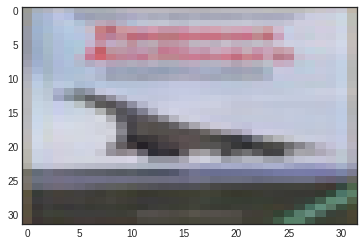

In [ ]:
labelNames = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# How CNN Classifies an Image?
img_idx = 3
plt.imshow(x_test[img_idx],aspect='auto')
print('Actual label:', labelNames[np.argmax(y_test[img_idx])])
# Preper image to predict
test_image =np.expand_dims(x_test[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',labelNames[VGG_model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', VGG_model.predict(test_image,batch_size=1))


## Notes :

- The padding is chosen as 1 pixel so the spatial resolution is preserved through the convolutional layers. Thus, the spatial resolution will only change at the pooling layers
- The pooling layer does not learn anything
- fully-connected layers : Activation size previous layer * Activation size actual layer + 1

### Do you want to check other VGG Net configurations easly?


In [10]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=None, classes=10, classifier_activation='softmax')

vgg16.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

### Parameters :

https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16